In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from Methods.costs import * 
from Methods.least_squares import * 
from Methods.ridge import *
from Methods.cross_validation import *
from Methods.split_data import *
from Methods.scaling_standardization import *
from Methods.build_polynomial import *
from Methods.clearDataset import *

%load_ext autoreload
%autoreload 2

## Load the training data into feature matrix, class labels, and event ids:

In [2]:
from Methods.proj1_helpers import *
DATA_TRAIN_PATH = 'csv/train.csv'
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)
tX_tra = tX.T

## Do your thing crazy machine learning thing here :) ...

# Raw Data Analysis 

### Visualisation of the data

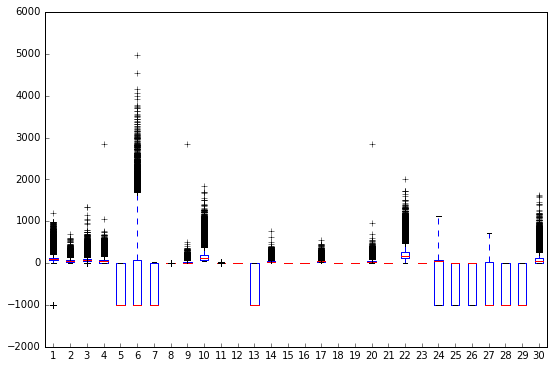

In [3]:
#Boxplot of the Raw Data
boxplot(tX, -2000, 6000, 'boxplot_original')

# Feature Processing

## Data scaling 

In [4]:
minima_tX = data_scaling(tX.T)

##### Boxplot of the scale data

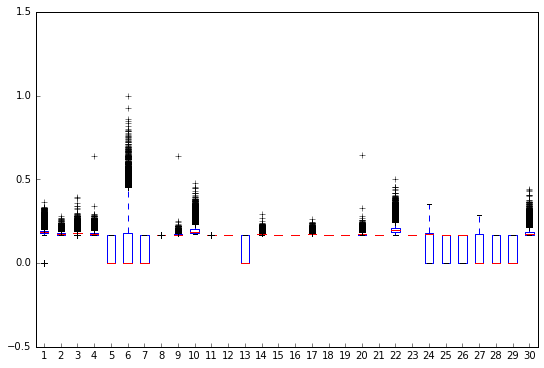

In [5]:
boxplot(minima_tX, -0.5, 1.5, 'boxplot_scaled')

## Data standardization

In [6]:
std_tX = data_standardization(tX.T)

##### Boxplot of the Standardized data

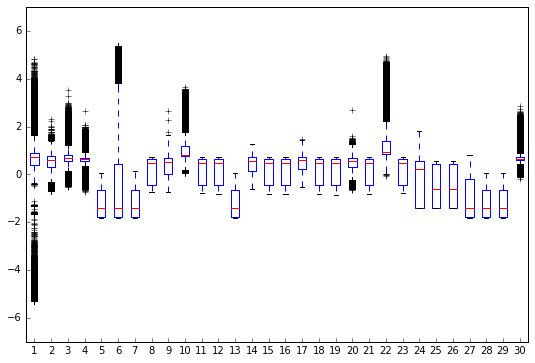

In [7]:
boxplot(std_tX, -7, 7, 'boxplot_standardized')

## Feature Deletion

In [8]:
PERCENT_FACTOR = 0.5
dele_tX_temp = deleteNoneWantedData(tX, PERCENT_FACTOR)
dele_tX = deleteUnwantedLine(dele_tX_temp)

## Replace Undefined variables by mean of all the other variables

In [9]:
mean_tX = averageData(tX)

## Polynomial Transformation

### Polynome

### Squared

In [10]:
tx_squares = build_poly_matrix(tX, 2)

### Sqrt

## Other Transformations

### Log

### Other? 

## Model Selection

### Least Squares

In [15]:
w = least_squares(y, tX)
print(w)

[  4.11236193e-05  -7.58093412e-03  -5.60732447e-03  -5.22545681e-04
  -4.47471574e-02   5.16577560e-04  -1.53551405e-02   2.97140895e-01
  -1.39325870e-03  -2.79211968e+00  -2.48660320e-01   9.82514983e-02
   3.45999768e-01   2.79904922e+00  -4.47852611e-04  -7.39545806e-04
   2.80533576e+00  -1.09832905e-03   1.23511990e-03   3.11742132e-03
   5.50036683e-04  -5.12787102e-04  -2.84800463e-01  -5.30172680e-03
   4.68129559e-04   3.69288507e-04  -9.76263056e-03   1.50504847e-03
  -2.16592538e-03   2.79711316e+00]


### Ridge Regression

In [17]:
w_ridge = ridge_regression(y, tX, lamb=1)
print(w_ridge)

[ 0.00037209 -0.00998928 -0.00193089 -0.00122927 -0.00141511  0.00057402
 -0.01026411  0.01927819 -0.00103996  0.00375086 -0.01482353  0.03240492
  0.00445871  0.00490993 -0.00025925 -0.00109056  0.00130353 -0.0003454
  0.00084868  0.00322532  0.0004222  -0.00059638 -0.01037426 -0.00213284
  0.00017204  0.00050305 -0.00579336  0.00049    -0.00070342 -0.00246223]


### Least squares Gradient Descent

### Least squares Stochastique Gradient Descent

### Logistic regression

### Reg logistic regression

## Verification

In [ ]:
prediction = np.dot(w,tX.T)

prediction[prediction < 0] = -1
prediction[prediction >= 0] = 1

result = np.sum(y == prediction) / float(len(y))

result

### Cross Validation

### Ridge

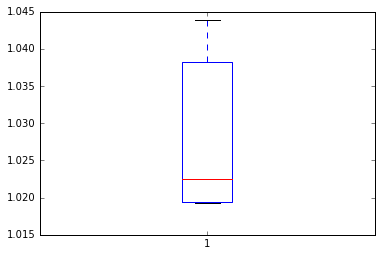

[1.0193409635642041, 1.0193723559131864, 1.0193723559131864, 1.019419442624085, 1.0194194426240848, 1.0193566598595412, 1.0194979156427932, 1.0197489887222246, 1.0200862708614402, 1.0216692224002835, 1.0233357220384716, 1.0270657233108307, 1.0311546925655724, 1.0346941577103836, 1.0379055833745188, 1.039299764264382, 1.040630578063128, 1.0415450062287275, 1.0427655537080232, 1.043854395976757]


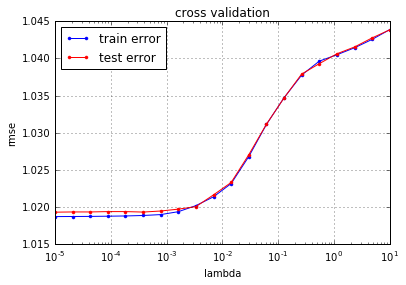

In [18]:
seed = 1
k_fold = 10
lambdas = np.logspace(-5, 1, 20)

# split data in k fold
k_indices = build_k_indices(y, k_fold, seed)

# define lists to store the loss of training data and test data
rmse_tr = []
rmse_te = []
k_list = list(range(k_fold))
for lamb in lambdas:
    tot_loss_tr = 0
    tot_loss_te = 0
    for k in k_list:
        loss_tr, loss_te = cross_validation_sexy(y, tX, k_indices, k, ridge_regression, lamb = lamb)
        tot_loss_tr += loss_tr
        tot_loss_te += loss_te
    rmse_tr.append(np.sqrt(2/k_fold * tot_loss_tr))
    rmse_te.append(np.sqrt(2/k_fold * tot_loss_te))
plt.boxplot(rmse_te)
plt.show()
print(rmse_te)
cross_validation_visualization(lambdas, rmse_tr, rmse_te)

### Least Squares

In [21]:
seed = 1
k_fold = 10

# split data in k fold
k_indices = build_k_indices(y, k_fold, seed)

# define lists to store the loss of training data and test data
rmse_tr = []
rmse_te = []
k_list = list(range(k_fold))
tot_loss_tr = 0
tot_loss_te = 0
for k in k_list:
    loss_tr, loss_te = cross_validation_sexy(y, tX, k_indices, k, least_squares)
    tot_loss_tr += loss_tr
    tot_loss_te += loss_te
rmse_tr.append(np.sqrt(2/k_fold * tot_loss_tr))
rmse_te.append(np.sqrt(2/k_fold * tot_loss_te))


###  Bias-Variance decomposition

### Binary Classification

In [ ]:
#Use predict_labels de project helpers (fait la multiplication entre tX et les w)

## Generate predictions and save ouput in csv format for submission:

In [ ]:
DATA_TEST_PATH = 'csv/test.csv' # TODO: download train data and supply path here 
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)

In [ ]:
OUTPUT_PATH = 'csv/sample-submission.csv' # TODO: fill in desired name of output file for submission
y_pred = predict_labels(weights, tX_test)
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)